In [ ]:
import cv2
cv2.__version__

'4.10.0'

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/dltpdn/insightbook.opencv_project_python

Cloning into 'insightbook.opencv_project_python'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 469 (delta 23), reused 38 (delta 16), pack-reused 389 (from 1)
Receiving objects: 100% (469/469), 30.72 MiB | 14.63 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
%cd /content/insightbook.opencv_project_python/07.segmentation

/content/insightbook.opencv_project_python/07.segmentation


## 문제 아래 컨투어 예제, 허프 선 예제, 확률적 허프선 예제 그리고 트랙바 예제를 notebook에서 실행해 보고 트랙바에서 컨투어, 허프 선, 확률적 허프선의 인자를 변경하도록 수정해 주세요

In [ ]:
!python cntr_hierarchy.py

3 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]
(1, 3, 4)
(1, 6, 4)
6 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


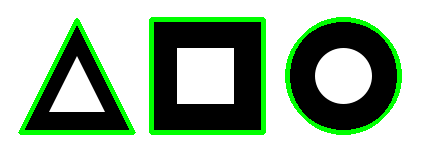

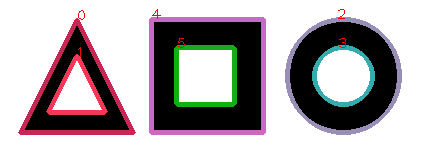

In [ ]:
import cv2
import numpy as np

# 영상 읽기
img = cv2.imread('../img/shapes_donut.png')
img2 = img.copy()
# 바이너리 이미지로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥 컨투어만 수집   --- ①
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                               cv2.CHAIN_APPROX_NONE)[-2:]
# 컨투어 갯수와 계층 트리 출력 --- ②
print(len(contour), hierarchy)
print(hierarchy.shape)

# 모든 컨투어를 트리 계층 으로 수집 ---③
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, \
                                            cv2.CHAIN_APPROX_SIMPLE)[-2:]

print(hierarchy.shape)
# 컨투어 갯수와 계층 트리 출력 ---④
print(len(contour2), hierarchy)

# 가장 바깥 컨투어만 그리기 ---⑤
cv2.drawContours(img, contour, -1, (0,255,0), 3)
# 모든 컨투어 그리기 ---⑥
for idx, cont in enumerate(contour2):
    # 랜덤한 컬러 추출 ---⑦
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 ---⑧
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 ---⑨
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))

# 화면 출력
#cv2.imshow('RETR_EXTERNAL', img)
#cv2.imshow('RETR_TREE', img2)

cv2_imshow(img)
cv2_imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

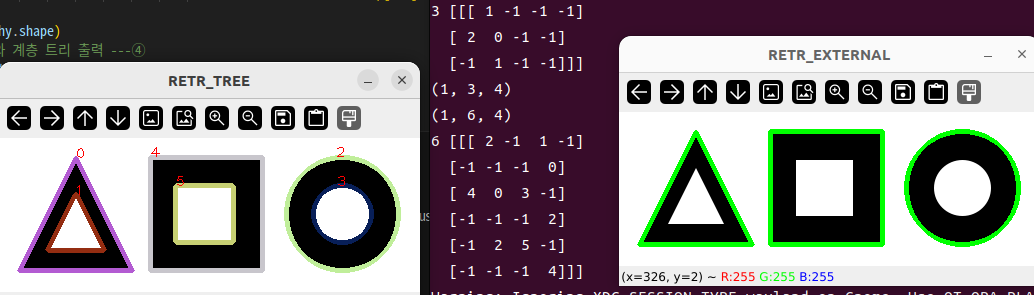

### 7.2.1 허프 선 변환

이미지는 수많은 픽셀로 구성되어 있습니다. 그 픽셀 중 서로 직선 관계를 갖는 픽셀들만 골라내는 것이 허프 선 변환의 핵심입니다. OpenCV에서는 허프 변환을 위해 아래와 같은 함수를 제공합니다.



`lines = cv2.HoughLines(img, rho, theta, threshold, lines, srn=0, stn=0, min_theta, max_theta)`
- img: 입력 이미지, 1 채널 바이너리 스케일
- rho: 거리 측정 해상도, 0~1
- theta: 각도, 라디안 단위 (np.pi/0~180)
- threshold: 직선으로 판단할 최소한의 동일 개수 (작은 값: 정확도 감소, 검출 개수 증가 / 큰 값: 정확도 증가, 검출 개수 감소)
- lines: 검출 결과, N x 1 x 2 배열 (r, Θ)
- srn, stn: 멀티 스케일 허프 변환에 사용, 선 검출에서는 사용 안 함
- min_theta, max_theta: 검출을 위해 사용할 최대, 최소 각도

거리와 각도를 얼마나 세밀하게 계산할 것인지를 rho와 theta 파라미터로 조정할 수 있습니다.

threshold는 같은 직선에 몇 개의 점이 등장해야 직선으로 판단할지를 나타내는 최소한의 개수를 말합니다.

아래는 직선을 검출하고 기준 좌표에 빨간 점을 찍은 예시입니다.

In [ ]:
!python hough_line.py

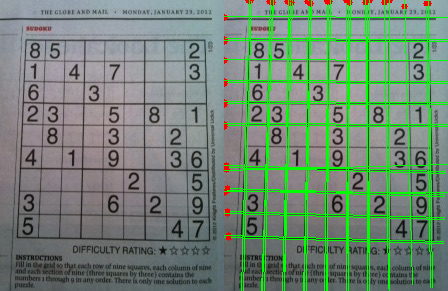

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/sudoku.jpg')
img2 = img.copy()
h, w = img.shape[:2]
# 그레이 스케일 변환 및 엣지 검출 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 100, 200 )
# 허프 선 검출 ---②
lines = cv2.HoughLines(edges, 1, np.pi/180, 130)
for line in lines: # 검출된 모든 선 순회
    r,theta = line[0] # 거리와 각도wh
    tx, ty = np.cos(theta), np.sin(theta) # x, y축에 대한 삼각비
    x0, y0 = tx*r, ty*r  #x, y 기준(절편) 좌표
    # 기준 좌표에 빨강색 점 그리기
    cv2.circle(img2, (int(abs(x0)), int(abs(y0))), 3, (0,0,255), -1)
    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1, y1 = int(x0 + w*(-ty)), int(y0 + h * tx)
    x2, y2 = int(x0 - w*(-ty)), int(y0 - h * tx)
    # 선그리기
    cv2.line(img2, (x1, y1), (x2, y2), (0,255,0), 1)

#결과 출력
merged = np.hstack((img, img2))
#cv2.imshow('hough line', merged)
cv2_imshow(merged)
cv2.waitKey()
cv2.destroyAllWindows()

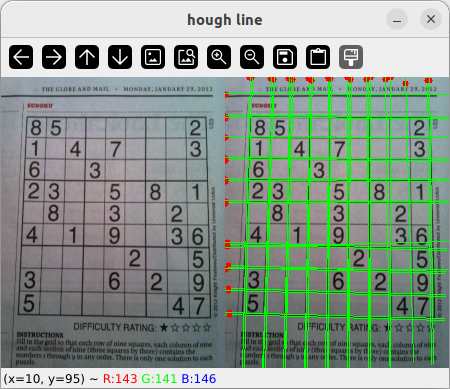

우선 캐니 엣지로 경계값을 검출한 뒤 허프 선 검출을 했습니다.

### 7.2.2 확률적 허프 선 변환

허프 선 검출은 모든 점에 대해 수많은 선을 그어서 직선을 찾기 때문에 연산량이 무척 많습니다.

이를 개선하기 위한 방법이 확률적 허프 선 변환입니다.

이는 모든 점을 고려하지 않고 무작위로 선정한 픽셀에 대해 허프 변환을 수행하고 점차 그 수를 증가시키는 방법입니다.

다음의 함수로 확률적 허프 선 변환을 수행할 수 있습니다.


`lines = cv2.HoughLinesP(img, rho, theta, threshold, lines, minLineLength, maxLineGap)`
- minLineLength(optional): 선으로 인정할 최소 길이
- maxLineGap(optional): 선으로 판단할 최대 간격
- lines: 검출된 선 좌표, N x 1 x 4 배열 (x1, y1, x2, y2)
- 이외의 파라미터는 cv2.HoughLines()와 동일

`cv2.HoughLines()`의 검출 결과는 r, Θ이지만 `cv2.HoughLinesP()`의 검출 결과는 선의 시작과 끝 좌표입니다.

이는 확률적으로 선을 검출하므로 당연히 `cv2.HoughLines()`보다 선 검출이 적습니다. 따라서 엣지를 강하게 하고 threshold를 낮게 지정해주어야 합니다.

In [ ]:
!python hough_lineP.py

(291, 224, 3)
(291, 224)


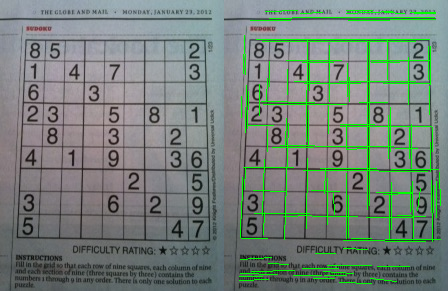

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/sudoku.jpg')
print(img.shape)
img2 = img.copy()
# 그레이 스케일로 변환 및 엣지 검출 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(imgray.shape)

edges = cv2.Canny(imgray, 50, 200 )

# 확율 허프 변환 적용 ---②
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)
for line in lines:
    # 검출된 선 그리기 ---③
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1,y1), (x2, y2), (0,255,0), 1)

merged = np.hstack((img, img2))
#cv2.imshow('Probability hough line', merged)
cv2_imshow(merged)
cv2.waitKey()
cv2.destroyAllWindows()

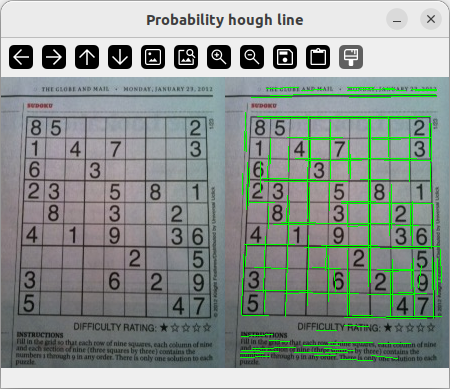
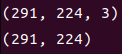

##트랙바 예제

In [ ]:
!python mean_shift.py

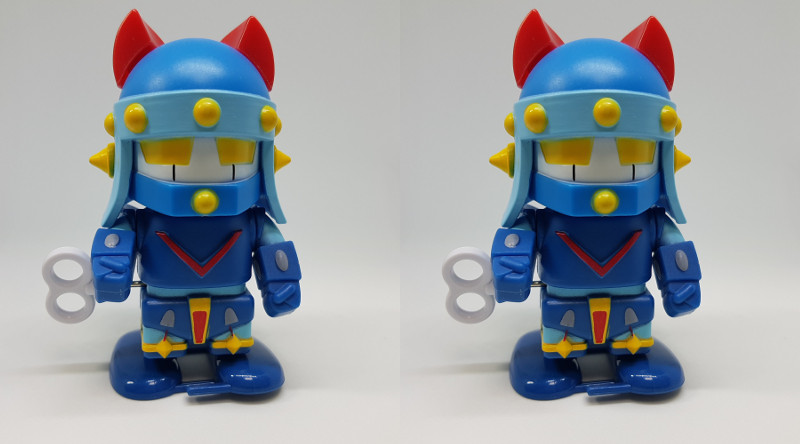

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window_QT.cpp:644: error: (-27:Null pointer) NULL guiReceiver (please create a window) in function 'cvCreateTrackbar2'


In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
# 트랙바 이벤트 처리 함수
def onChange(x):
    #sp, sr, level 선택 값 수집
    sp = cv2.getTrackbarPos('sp', 'img')
    sr = cv2.getTrackbarPos('sr', 'img')
    lv = cv2.getTrackbarPos('lv', 'img')

    # 평균 이동 필터 적용 ---①
    mean = cv2.pyrMeanShiftFiltering(img, sp, sr, None, lv)
    # 변환 이미지 출력
    cv2.imshow('img', np.hstack((img, mean)))

# 초기 화면 출력
#cv2.imshow('img', np.hstack((img, img)))
cv2_imshow(np.hstack((img, img)))
# 트랙바 이벤트 함수 연결
cv2.createTrackbar('sp', 'img', 0,100, onChange)
cv2.createTrackbar('sr', 'img', 0,100, onChange)
cv2.createTrackbar('lv', 'img', 0,5, onChange)
cv2.waitKey(0)
cv2.destroyAllWindows()

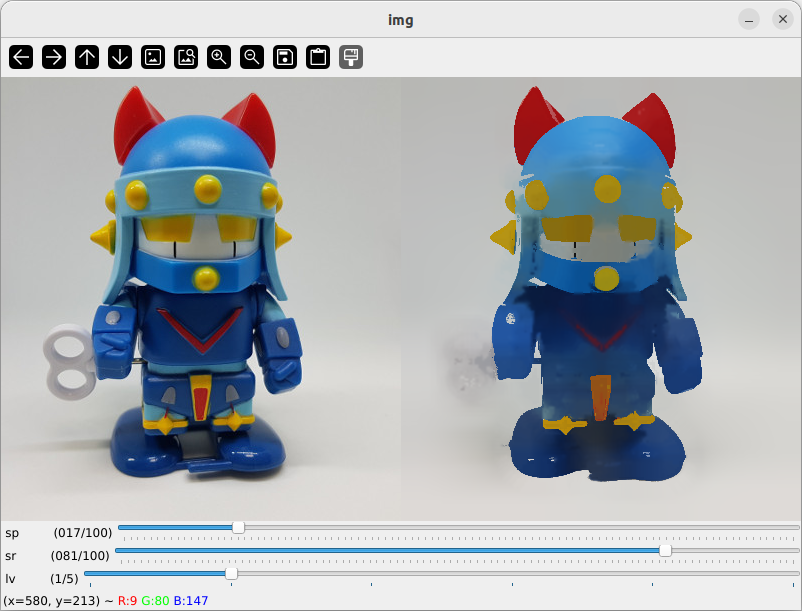

#컨투어 트랙바

In [ ]:
import cv2
import numpy as np

def update_contours(_):
    # 트랙바 값 읽기
    threshold_value = cv2.getTrackbarPos('Threshold', 'Contours')
    retrieval_mode = cv2.getTrackbarPos('Retrieval Mode', 'Contours')

    # 바이너리 이미지로 변환
    ret, imthres = cv2.threshold(imgray, threshold_value, 255, cv2.THRESH_BINARY_INV)

    # 선택된 Retrieval Mode에 따라 컨투어 수집
    if retrieval_mode == 0:
        contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2:]
    else:
        contour, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]

    # 컨투어 그리기
    img_display = img.copy()
    for idx, cont in enumerate(contour):
        color = [int(i) for i in np.random.randint(0, 255, 3)]
        cv2.drawContours(img_display, contour, idx, color, 3)
        cv2.putText(img_display, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))

    # 결과 이미지 출력
    # cv2.imshow('Contours', img_display)
    cv2_imshow(img_display)

# 영상 읽기
img = cv2.imread('../img/shapes_donut.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 윈도우 생성
cv2.namedWindow('Contours')

# 트랙바 생성
cv2.createTrackbar('Threshold', 'Contours', 127, 255, update_contours)
cv2.createTrackbar('Retrieval Mode', 'Contours', 0, 1, update_contours)

# 초기 상태 업데이트
update_contours(0)

# 키 입력 대기
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window_QT.cpp:644: error: (-27:Null pointer) NULL guiReceiver (please create a window) in function 'cvCreateTrackbar2'


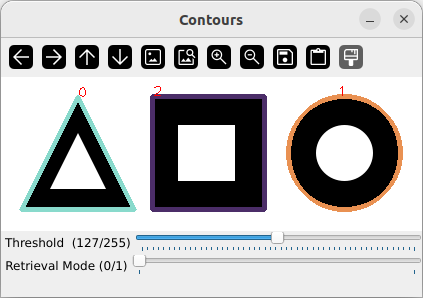

# 허프선 트랙바

In [ ]:
import cv2
import numpy as np

def update(_):
    # 트랙바 값 읽기
    threshold_value = cv2.getTrackbarPos('Threshold', 'HoughLine')
    radian = cv2.getTrackbarPos('Radian', 'HoughLine')

    # 그레이 스케일 변환 및 엣지 검출
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(imgray, 100, 200)

    # 허프 선 검출
    lines = cv2.HoughLines(edges, 1, np.pi/radian, threshold_value)
    img2 = img.copy()

    if lines is not None:  # lines가 None이 아닌 경우에만 반복
        for line in lines:  # 검출된 모든 선 순회
            r, theta = line[0]  # 거리와 각도
            tx, ty = np.cos(theta), np.sin(theta)  # x, y축에 대한 삼각비
            x0, y0 = tx * r, ty * r  # x, y 기준(절편) 좌표
            # 기준 좌표에 빨강색 점 그리기
            cv2.circle(img2, (int(abs(x0)), int(abs(y0))), 3, (0, 0, 255), -1)
            # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
            x1, y1 = int(x0 + w * (-ty)), int(y0 + h * tx)
            x2, y2 = int(x0 - w * (-ty)), int(y0 - h * tx)
            # 선 그리기
            cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 1)

    # 결과 출력
    merged = np.hstack((img, img2))
    cv2.imshow('HoughLine', merged)

# 영상 읽기
img = cv2.imread('../img/sudoku.jpg')
h, w = img.shape[:2]

# 윈도우 생성
cv2.namedWindow('HoughLine')

# 트랙바 생성
cv2.createTrackbar('Threshold', 'HoughLine', 127, 255, update)
cv2.createTrackbar('Radian', 'HoughLine', 1, 180, update)

# 트랙바 최솟값 설정
cv2.setTrackbarMin('Radian','HoughLine',1)

# 초기 상태 업데이트
update(0)

# 키 입력 대기
cv2.waitKey(0)
cv2.destroyAllWindows()

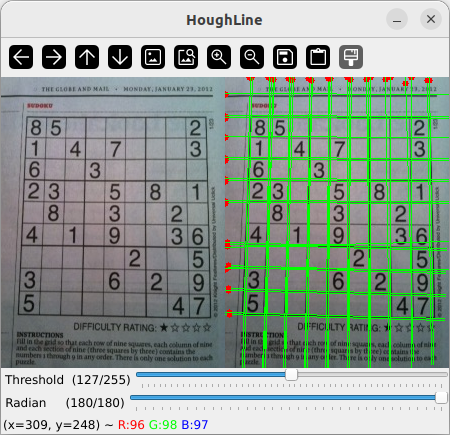

#확률적 허프선 트랙바

lines = cv2.HoughLinesP(img, rho, theta, threshold, lines, minLineLength, maxLineGap)

minLineLength(optional): 선으로 인정할 최소 길이

maxLineGap(optional): 선으로 판단할 최대 간격

lines: 검출된 선 좌표, N x 1 x 4 배열 (x1, y1, x2, y2)

이외의 파라미터는 cv2.HoughLines()와 동일

In [ ]:
import cv2
import numpy as np

def update(_):
    #트랙바 값 읽기
    threshold_value = cv2.getTrackbarPos('threshold', 'Probability hough line')
    radian_value = cv2.getTrackbarPos('radian', 'Probability hough line')
    minLineLength_value = cv2.getTrackbarPos('min Line Length', 'Probability hough line')
    maxLineGap_value = cv2.getTrackbarPos('max Line Gap', 'Probability hough line')


    #그레이 스케일로 변환 및 엣지 검출
    img2 = img.copy()
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(imgray, 50, 200 )

    #확률 허프 변환 적용
    lines = cv2.HoughLinesP(edges, 1, np.pi/radian_value, threshold_value, None, minLineLength_value, maxLineGap_value)

    #선 그리기
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img2, (x1,y1), (x2, y2), (0,255,0), 1)

    #결과 출력
    merged = np.hstack((img, img2))
    cv2.imshow('Probability hough line', merged)

#이미지 불러오기
img = cv2.imread('../img/sudoku.jpg')

#윈도우 생성
cv2.namedWindow('Probability hough line')

#트랙바 생성
cv2.createTrackbar('threshold', 'Probability hough line', 0, 255, update)
cv2.createTrackbar('radian', 'Probability hough line', 1, 180, update)
cv2.createTrackbar('min Line Length', 'Probability hough line', 10, 100, update)
cv2.createTrackbar('max Line Gap', 'Probability hough line', 5, 50, update)

#최솟값 설정
cv2.setTrackbarMin('radian','Probability hough line', 1)
cv2.setTrackbarMin('min Line Length','Probability hough line', 10)
cv2.setTrackbarMin('max Line Gap','Probability hough line', 5)

#초기 상태 업데이트
update(0)

#대기 및 종료
cv2.waitKey(0)
cv2.destroyAllWindows()

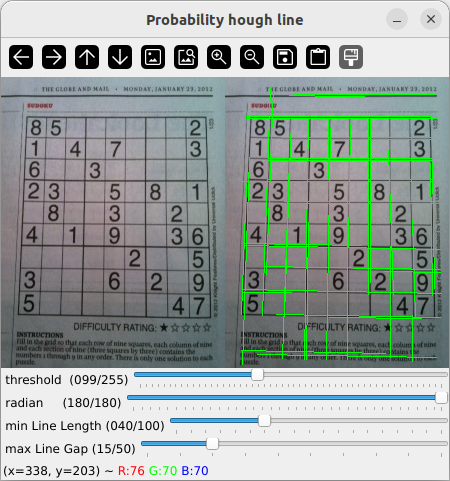